# SEP 787 - COURSE PROJECT

### Project Members:
- Meet Patel - 400486035
- Muskan - 400485934
- Prathamesh Joshi - 400485705
- Vishruth Bengaluru Subramanyam - 400486492

### Project Objective:

To compare the results derived from the classifications and obtain the below
results:
- Computational times for both training and testing
- Grid Search Cross Validation for parameter selection
- Plot and compare ROC (Receiver Operating Characteristic) curves
- Confusion matrix of results from each classifier


### Algorithms Used:
- KNN
- SVM
- Gassian Niave Bayes



## Loading Libraries 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To ignore non-error warnings
import warnings
warnings.filterwarnings('ignore')

# Loading K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Loading AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# Loading Support Vector Machine (SVM)
from sklearn.svm import SVC

# For Metrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.impute import SimpleImputer
import time

# Test Train model selection & Cross validation score
from sklearn.model_selection import train_test_split, cross_val_score
# Precision_score, Recall_score, Confusion_matrix, Accuracy_score, F1_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, f1_score
# Mean_absolute_error, Mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Loading Dataset

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ML AI /Project/Pumpkin_Seeds_Dataset.xlsx')

In [ ]:
# Shape of the dataset
data.shape

(2500, 13)

In [ ]:
# Sample records from the dataset
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
# Finding the precence of Null values in the Dataset (Handling Null Values)
data.isnull().sum().sort_values(ascending=False)

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [ ]:
# Finding the percentage of NaN values
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'Column_Name': data.columns,'% Missing': percent_missing})
missing_value_df.sort_values(by='% Missing', ascending=False)

,Column_Name,% Missing
Area,Area,0.0
Perimeter,Perimeter,0.0
Major_Axis_Length,Major_Axis_Length,0.0
Minor_Axis_Length,Minor_Axis_Length,0.0
Convex_Area,Convex_Area,0.0
Equiv_Diameter,Equiv_Diameter,0.0
Eccentricity,Eccentricity,0.0
Solidity,Solidity,0.0
Extent,Extent,0.0
Roundness,Roundness,0.0


## Defining Features and Target

In [ ]:
data['Class'] = data['Class'].replace('Çerçevelik',0)
data['Class'] = data['Class'].replace('Ürgüp Sivrisi',1)

In [ ]:
features = data.drop(['Class'], axis=1)
target = data["Class"]

print("\nShape of the Features: ", features.shape)
print("Columns in the Features: ", features.columns)

print("\nShape of the Target: ", target.shape)
print("Type of the Target: ", type(target))


Shape of the Features:  (2500, 12)
Columns in the Features:  Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

Shape of the Target:  (2500,)
Type of the Target:  <class 'pandas.core.series.Series'>


In [ ]:
target = target.to_numpy()

In [ ]:
target = target.reshape(2500,1)

In [ ]:
target = pd.DataFrame(target)

In [ ]:
type(target)

pandas.core.frame.DataFrame

In [ ]:
# print('Equal number of death and survival rate for the Dataset which is balanced using SMOTE technique')
data['Class'].value_counts()


0    1300
1    1200
Name: Class, dtype: int64

In [ ]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


## Defining and Splitting the data into Training & Testing Sets

In [ ]:
from numpy import asarray
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(features)
# print(scaled_X)
# y_scaled = scaler.fit_transform(target)
# print(scaled_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size = 0.33, random_state = 42)

#KNN

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................

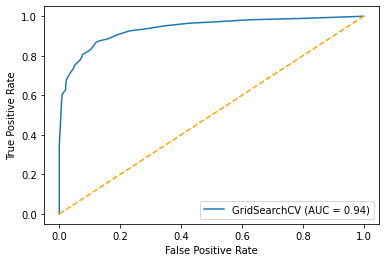

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from sklearn.exceptions import DataConversionWarning
import math




k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5,scoring='roc_auc',return_train_score=True ,verbose=2)

# Model Fit
start_time = time.time()

grid_search_knn.fit(X_train, y_train)



# KNN_model = KNeighborsClassifier(n_neighbors = k_neighbors).fit(X_train, y_train);
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
KNN_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = grid_search_knn.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
KNN_testing_time = elapsed_time

# Model Evaluation
KNN_Accuracy         = accuracy_score(y_test, y_predicted)
KNN_Recall           = recall_score(y_test, y_predicted, average = "weighted")
KNN_Precision        = precision_score(y_test, y_predicted, average = "weighted")
KNN_Score            = f1_score(y_test, y_predicted, average = 'micro')
KNN_Confusion_Matrix = confusion_matrix(y_test, y_predicted)

print("\nConfusion Matrix : ")
print(KNN_Confusion_Matrix)

print("True Negative    : ", KNN_Confusion_Matrix[0,0])
print("False Negative   : ", KNN_Confusion_Matrix[1,0])
print("True Positive    : ", KNN_Confusion_Matrix[1,1])
print("False Positive   : ", KNN_Confusion_Matrix[0,1])


print("\nAccuracy         : ", KNN_Accuracy)
print("Recall           : ", KNN_Recall)
print("Precision        : ", KNN_Precision)
print("F1 Score         : ", KNN_Score)

print("\nTest-set R-square value : {:.2f}".format(grid_search_knn.score(X_test, y_test)))
print("\n Plotting KNN ROC Curve:")

metrics.plot_roc_curve(grid_search_knn, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [ ]:
train_auc= grid_search_knn.cv_results_['mean_train_score']
train_auc_std= grid_search_knn.cv_results_['std_train_score']
cv_auc = grid_search_knn.cv_results_['mean_test_score'] 
cv_auc_std= grid_search_knn.cv_results_['std_test_score']

100%|██████████| 30/30 [00:00<00:00, 176478.43it/s]


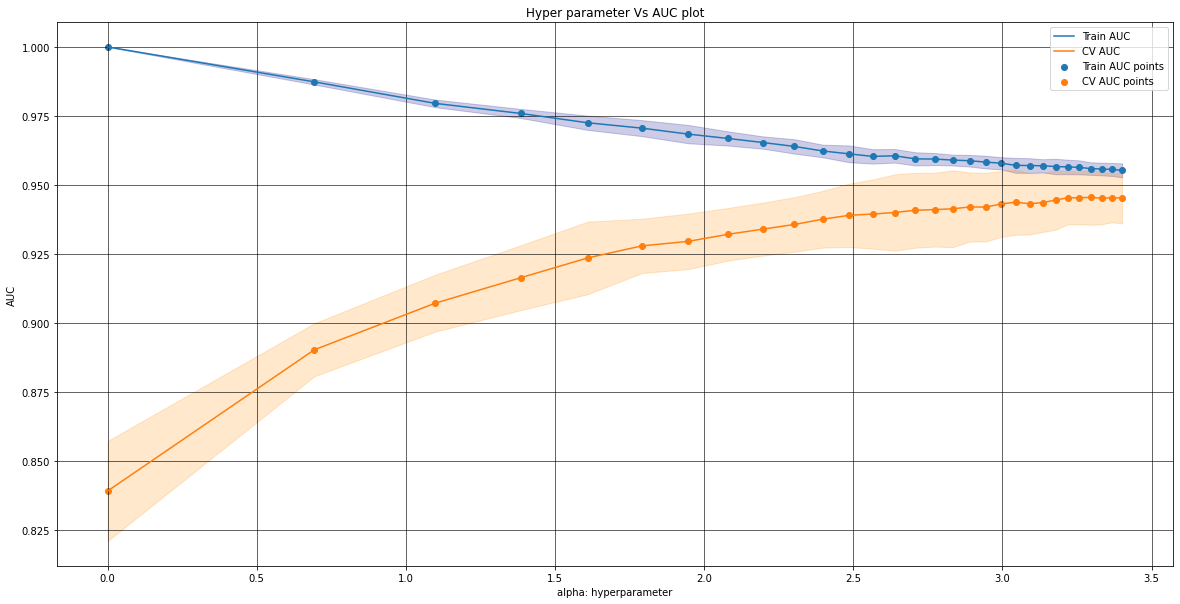

In [ ]:
from tqdm import tqdm
knn = list(range(1, 31))
log_knn=[]
for val in tqdm(knn):
    val1 = math.log(val)
    log_knn.append(val1)

plt.figure(figsize=(20,10))
plt.plot(log_knn, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_knn, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_knn, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_knn  , cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_knn, train_auc, label='Train AUC points')
plt.scatter(log_knn, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.6)
plt.show()


In [ ]:
print('Best Score seen :',grid_search_knn.best_score_)
print('Best gamma value in whole of parameter list :',grid_search_knn.best_params_)
print(grid_search_knn.best_index_)

Best Score seen : 0.94553464696529
Best gamma value in whole of parameter list : {'n_neighbors': 27}
26


In [ ]:
grid_search_knn.best_params_['n_neighbors']

27

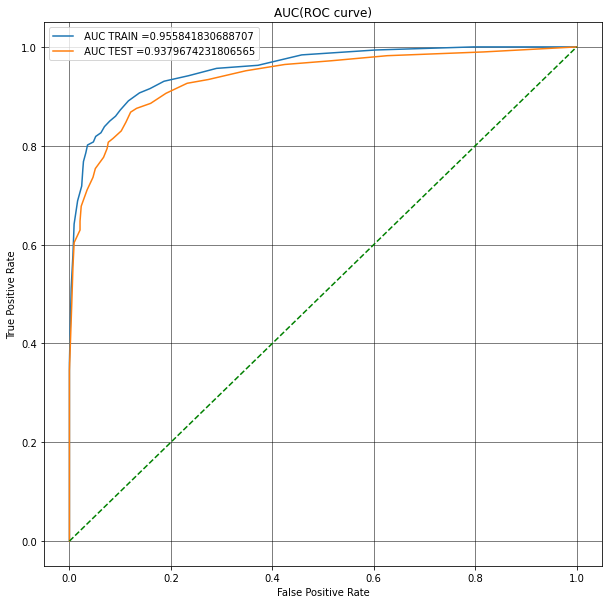

In [ ]:
from sklearn.metrics import roc_curve, auc

test_knn = KNeighborsClassifier(n_neighbors = grid_search_knn.best_params_['n_neighbors'])
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

test_knn.fit(X_train, y_train)

# predict probabilities
y_train_pred = test_knn.predict_proba(X_train)
y_test_pred = test_knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_train_pred = y_train_pred[:, 1]
y_test_pred = y_test_pred[:, 1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(10,10))
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()



#SVM

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .........................................gamma=0.01; total time=   0.1s
[CV] END .........................................gamma=0.01; total time=   0.1s
[CV] END .........................................gamma=0.01; total time=   0.1s
[CV] END .........................................gamma=0.01; total time=   0.1s
[CV] END .........................................gamma=0.01; total time=   0.1s
[CV] END ..........................................gamma=0.1; total time=   0.1s
[CV] END ..........................................gamma=0.1; total time=   0.1s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=0.1; total time=   0.1s
[CV] END ..........................................gamma=0.1; total time=   0.0s
[CV] END ..........................................gamma=1.0; total time=   0.1s
[CV] END ........................................

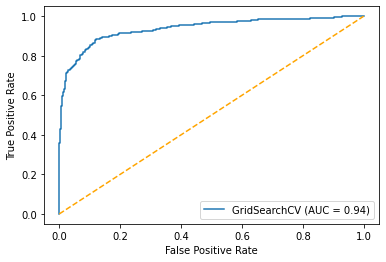

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from sklearn.exceptions import DataConversionWarning
import math

param_grid = {"gamma": [0.01,0.1, 1.0, 10, 100,1000]}

# Cs = [0.0001,0.001, 0.01, 0.1, 1, 10]
# tuned_parameters = [{'alpha': Cs}]

grid_search = GridSearchCV(SVC(), param_grid,cv=5,scoring='roc_auc',return_train_score=True ,verbose=2)

# Model Fit 
start_time = time.time()
grid_search.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
SVM_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = grid_search.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
SVM_testing_time = elapsed_time

# Model Evaluation
SVM_Accuracy         = accuracy_score(y_test, y_predicted)
SVM_Recall           = recall_score(y_test, y_predicted, average = "weighted")
SVM_Precision        = precision_score(y_test, y_predicted, average = "weighted")
SVM_Score            = f1_score(y_test, y_predicted, average = 'micro')
SVM_Confusion_Matrix = confusion_matrix(y_test, y_predicted)

print("\nConfusion Matrix : ")
print(SVM_Confusion_Matrix)

print("True Negative    : ", SVM_Confusion_Matrix[0,0])
print("False Negative   : ", SVM_Confusion_Matrix[1,0])
print("True Positive    : ", SVM_Confusion_Matrix[1,1])
print("False Positive   : ", SVM_Confusion_Matrix[0,1])


print("\nAccuracy         : ", SVM_Accuracy)
print("Recall           : ", SVM_Recall)
print("Precision        : ", SVM_Precision)
print("F1 Score         : ", SVM_Score)

print("\nTest-set R-square value : {:.2f}".format(grid_search.score(X_test, y_test)))
print("\n Plotting SVM ROC Curve:")

metrics.plot_roc_curve(grid_search, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



In [ ]:
train_auc= grid_search.cv_results_['mean_train_score']
train_auc_std= grid_search.cv_results_['std_train_score']
cv_auc = grid_search.cv_results_['mean_test_score'] 
cv_auc_std= grid_search.cv_results_['std_test_score']

100%|██████████| 6/6 [00:00<00:00, 46517.23it/s]


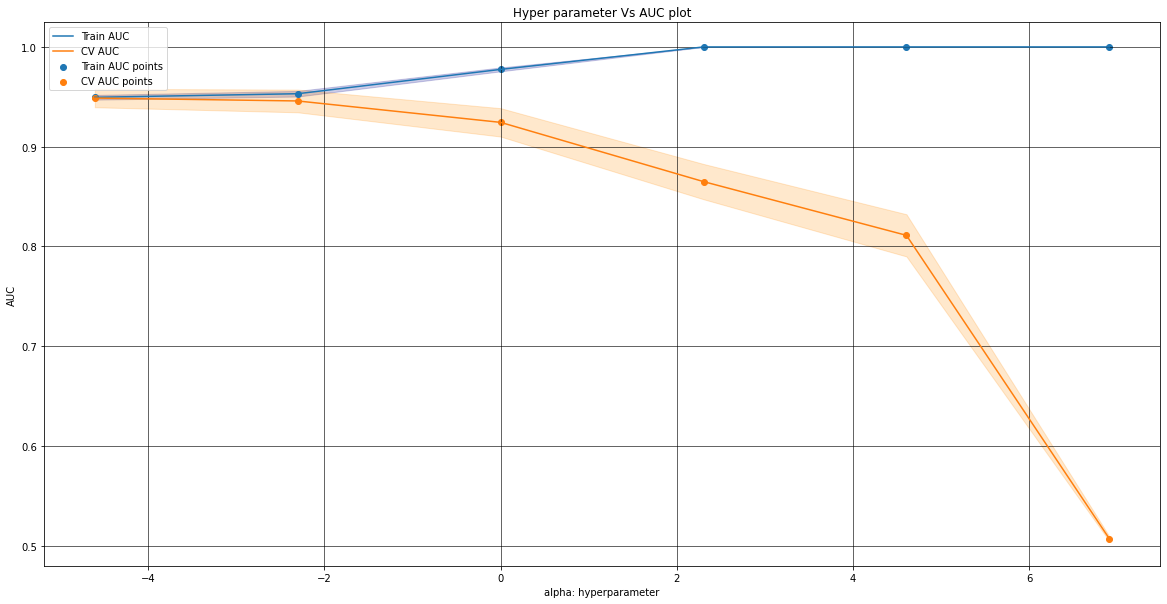

In [ ]:
from tqdm import tqdm
# alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
gamma = [0.01,0.1, 1.0, 10, 100,1000]

log_gamma=[]
for val in tqdm(gamma):
    val1 = math.log(val)
    log_gamma.append(val1)

plt.figure(figsize=(20,10))
plt.plot(log_gamma, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_gamma, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_gamma, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_gamma  , cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_gamma, train_auc, label='Train AUC points')
plt.scatter(log_gamma, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.6)
plt.show()


In [ ]:
print('Best Score seen :',grid_search.best_score_)
print('Best gamma value in whole of parameter list :',grid_search.best_params_)
print(grid_search.best_index_)

Best Score seen : 0.9487155098170399
Best gamma value in whole of parameter list : {'gamma': 0.01}
0


In [ ]:
grid_search.best_params_['gamma']

0.01

In [ ]:
def pred(pipe,data):
  y_pred=[]
  y_pred=grid_search.predict_proba(data)[:,1]
  return y_pred

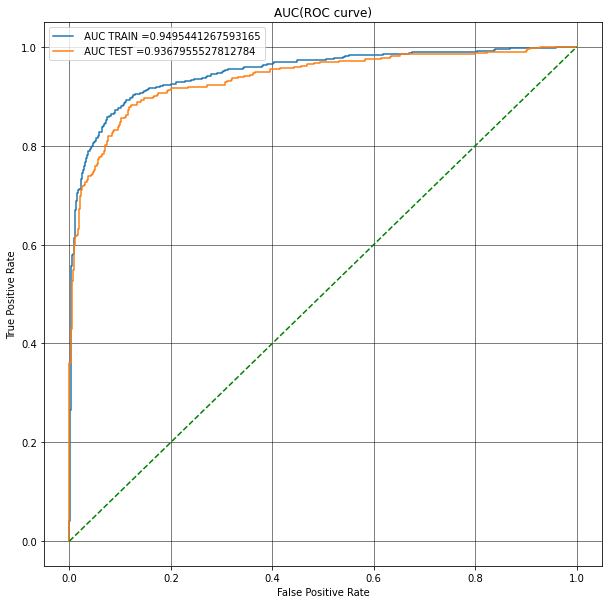

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

test_svc = SVC(gamma = grid_search.best_params_['gamma'])

test_svc.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = test_svc.decision_function(X_train)    
y_test_pred = test_svc.decision_function(X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(10,10))
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


#Naive Bayes

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

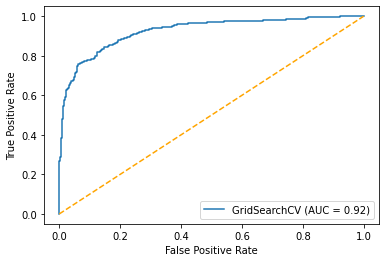

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# from sklearn.exceptions import DataConversionWarning
import math

# param_grid = {"gamma": [0.01,0.1, 1.0, 10, 100,1000]}
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search_nb = GridSearchCV(GaussianNB(), param_grid=params_NB,cv=5,scoring='roc_auc',return_train_score=True ,verbose=2)

# Model Fit 

start_time = time.time()
grid_search_nb.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print("Training Time    : {:.2}".format(elapsed_time))
NB_training_time = elapsed_time

# Model Predict
start_time = time.time()
y_predicted = grid_search_nb.predict(X_test)
elapsed_time = time.time() - start_time
print("Testing Time  : {:.2}".format(elapsed_time))
NB_testing_time = elapsed_time

# Model Evaluation
NB_Accuracy         = accuracy_score(y_test, y_predicted)
NB_Recall           = recall_score(y_test, y_predicted, average = "weighted")
NB_Precision        = precision_score(y_test, y_predicted, average = "weighted")
NB_Score            = f1_score(y_test, y_predicted, average = 'micro')
NB_Confusion_Matrix = confusion_matrix(y_test, y_predicted)

print("\nConfusion Matrix : ")
print(NB_Confusion_Matrix)

print("True Negative    : ", NB_Confusion_Matrix[0,0])
print("False Negative   : ", NB_Confusion_Matrix[1,0])
print("True Positive    : ", NB_Confusion_Matrix[1,1])
print("False Positive   : ", NB_Confusion_Matrix[0,1])


print("\nAccuracy         : ", NB_Accuracy)
print("Recall           : ", NB_Recall)
print("Precision        : ", NB_Precision)
print("F1 Score         : ", NB_Score)

print("\nTest-set R-square value : {:.2f}".format(grid_search_nb.score(X_test, y_test)))
print("\n Plotting SVM ROC Curve:")

metrics.plot_roc_curve(grid_search_nb, X_test, y_test)
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
train_auc= grid_search_nb.cv_results_['mean_train_score']
train_auc_std= grid_search_nb.cv_results_['std_train_score']
cv_auc = grid_search_nb.cv_results_['mean_test_score'] 
cv_auc_std= grid_search_nb.cv_results_['std_test_score']

In [ ]:
value = np.logspace(0,-9, num=100)
value = value.tolist()

100%|██████████| 100/100 [00:00<00:00, 364088.89it/s]


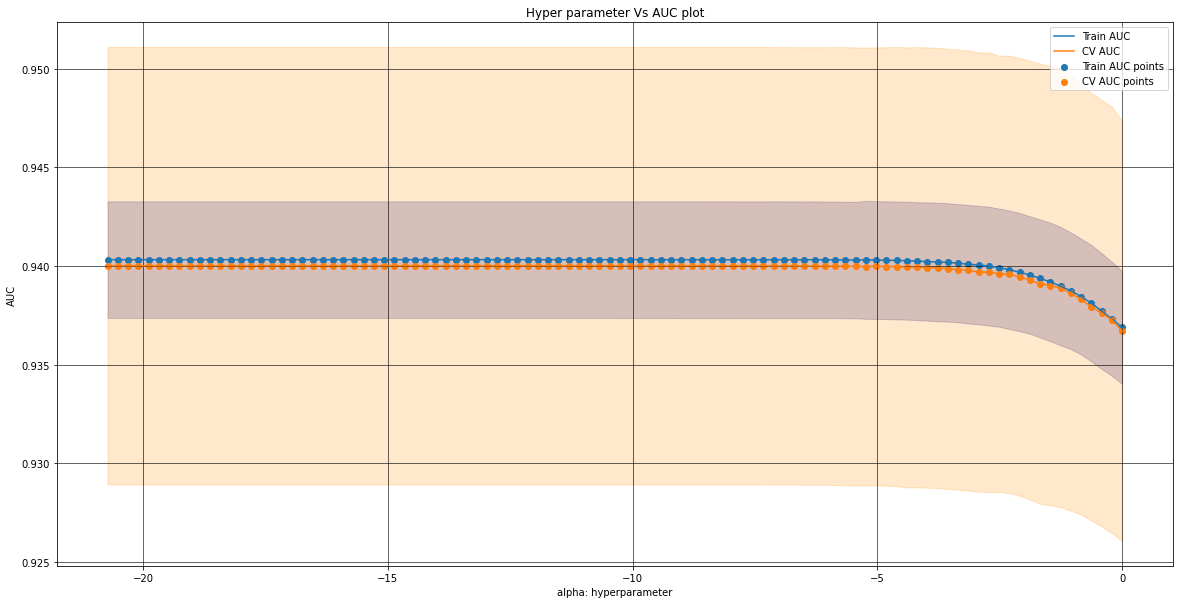

In [ ]:
from tqdm import tqdm
# alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]
val

log_gamma=[]
for val in tqdm(value):
    val1 = math.log(val)
    log_gamma.append(val1)

plt.figure(figsize=(20,10))
plt.plot(log_gamma, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_gamma, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_gamma, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(log_gamma  , cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_gamma, train_auc, label='Train AUC points')
plt.scatter(log_gamma, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid(color='black', linestyle='-', linewidth=0.6)
plt.show()


In [ ]:
print('Best Score seen :',grid_search_nb.best_score_)
print('Best gamma value in whole of parameter list :',grid_search_nb.best_params_)
print(grid_search_nb.best_index_)

Best Score seen : 0.9400203467401083
Best gamma value in whole of parameter list : {'var_smoothing': 0.0002848035868435802}
39


In [ ]:
grid_search_nb.best_params_['var_smoothing']

0.0002848035868435802

In [ ]:
def pred(pipe,data):
  y_pred=[]
  y_pred=grid_search_nb.predict_proba(data)[:,1]
  return y_pred

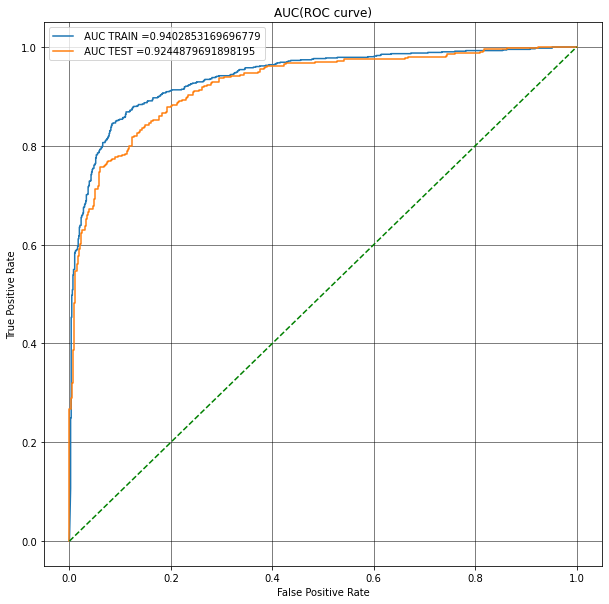

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

test_nb = GaussianNB(var_smoothing = grid_search_nb.best_params_['var_smoothing'])

test_nb.fit(X_train, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = pred(test_nb, X_train)    
y_test_pred = pred(test_nb, X_test)


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.figure(figsize=(10,10))
plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


#Comparing the results of the above used Classifier Algorithms 

### 1. Plotting graphs - Computational Times for both training and testing
#### 1.1 Comparing Training Time

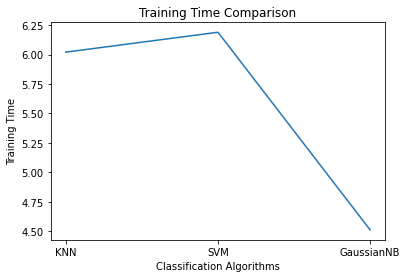

In [ ]:
algos = ['KNN','SVM','GaussianNB']
training_times = [KNN_training_time, SVM_training_time,NB_training_time]
plt.plot(algos,training_times)
plt.title('Training Time Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Training Time')
plt.show() 

#### 1.2 Comparing Testing Time

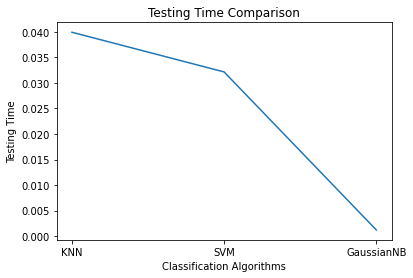

In [ ]:
algos = ['KNN','SVM','GaussianNB']
testing_times = [KNN_testing_time, SVM_testing_time, NB_testing_time]
plt.plot(algos,testing_times)
plt.title('Testing Time Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Testing Time')
plt.show()

### 2. Plotting graphs - Classifier Comparison based on Accuracy, Precision, Recall and F1-Score

#### 2.1 Comparing Accuracy

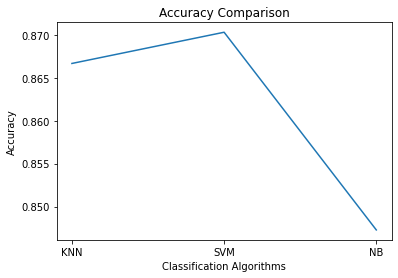

In [ ]:
algos = ['KNN','SVM','NB']
Accuracy_values = [KNN_Accuracy,SVM_Accuracy, NB_Accuracy]
plt.plot(algos,Accuracy_values)
plt.title('Accuracy Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Accuracy')
plt.show()

#### 2.2 Comparing Precision

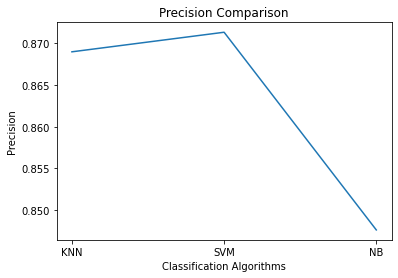

In [ ]:
algos = ['KNN','SVM','NB']
Precision_values = [KNN_Precision, SVM_Precision,NB_Precision]
plt.plot(algos,Precision_values)
plt.title('Precision Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Precision')
plt.show()

#### 2.3 Comparing Recall

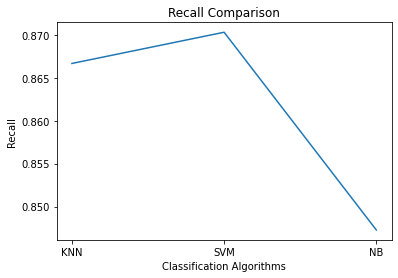

In [ ]:
algos = ['KNN','SVM','NB']
Recall_values = [KNN_Recall, SVM_Recall, NB_Recall]
plt.plot(algos,Recall_values)
plt.title('Recall Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('Recall')
plt.show()

#### 2.4 Comparing F1-Score

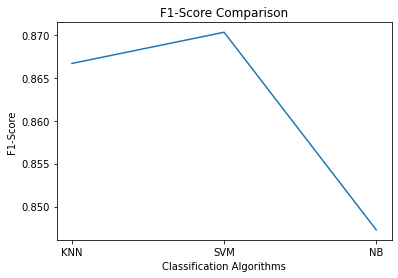

In [ ]:
algos = ['KNN','SVM','NB']
F1Scores = [KNN_Score,SVM_Score,NB_Score ]
plt.plot(algos,F1Scores)
plt.title('F1-Score Comparison')
plt.xlabel('Classification Algorithms')
plt.ylabel('F1-Score')
plt.show()

### 4. Plotting graphs - Classifier Comparison based on Confusion Matrix

In [ ]:
import seaborn as sns

#### 1. Plotting Confusion Matrix for KNN

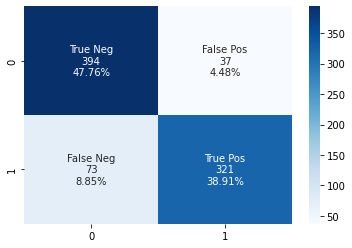

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in KNN_Confusion_Matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in KNN_Confusion_Matrix.flatten()/np.sum(KNN_Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(KNN_Confusion_Matrix, annot=labels, fmt='', cmap='Blues')

#### 2. Plotting Confusion Matrix for SVM

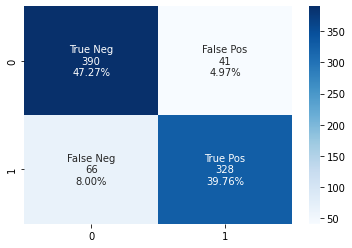

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in SVM_Confusion_Matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in SVM_Confusion_Matrix.flatten()/np.sum(SVM_Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(SVM_Confusion_Matrix, annot=labels, fmt='', cmap='Blues')

#### 3. Plotting Confusion Matrix for GaussianNB

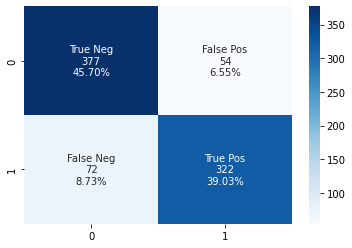

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in NB_Confusion_Matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in NB_Confusion_Matrix.flatten()/np.sum(NB_Confusion_Matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NB_Confusion_Matrix, annot=labels, fmt='', cmap='Blues')